In [76]:
from selenium import webdriver
from bs4 import BeautifulSoup
import time
import re
from bs4 import BeautifulSoup
import unicodedata

In [12]:
driver = webdriver.Chrome('c:/playwithdata/chromedriver.exe')
url = 'https://www.instagram.com/'
driver.get(url)
time.sleep(2)

In [77]:
email ='youremail'
input_id = driver.find_elements_by_css_selector('input._2hvTZ.pexuQ.zyHYP')[0]
input_id.clear()
input_id.send_keys(email)

password ='yourpassword'
input_pw = driver.find_elements_by_css_selector('input._2hvTZ.pexuQ.zyHYP')[1]
input_pw.clear()
input_pw.send_keys(password)
input_pw.submit()
time.sleep(3)

IndexError: list index out of range

In [82]:
def insta_searching(word):
    url = 'https://www.instagram.com/explore/tags/'+word
    return url

word = '송리단길맛집'
url = insta_searching(word)
driver.get(url)

##### 첫번째 게시글 받아오기

def select_first(driver):
    first = driver.find_element_by_css_selector("div._9AhH0")
    first.click()
    time.sleep(3)

select_first(driver)

##### 첫번째 게시글 받아오기

def select_first(driver):
    first = driver.find_element_by_css_selector("div._9AhH0")
    first.click()
    time.sleep(3)

select_first(driver)

def get_content(driver):
    # 1 현재 페이지의 html 정보 가져오기
    html = driver.page_source
    soup = BeautifulSoup(html, 'lxml')

    # 2  본문 내용 가져오기
    try:
        content = soup.select('div.C4VMK > span')[0].text
        content = unicodedata.normalize('NFC', content)
    except: 
        content = ''
    # 3 본문 내용에서 해시태그 가져오기(정규식 활용)
    tags = re.findall(r'#[^\s#,\\]+', content)
    
    # 4 작성일자 정보 가져오기
    date = soup.select('time._1o9PC.Nzb55')[0]['datetime'][:10]
    # 5 좋아요 수 가져오기
    try:
        like = soup.select('div.Nm9Fw > button')[0].text[4:-1]
    except:
        like = 0
    
    # 6 위치 정보 가져오기 
    try: 
        place = soup.select('div.M30cS')[0].text
        place = unicodedata.normalize('NFC', place)
    except:
        place =''
        
    # 7 수집한 정보 저장하기
    data = [content, date, like, place, tags]
    return data

get_content(driver)

# 다음 게시글 열기
def move_next(driver):
    right = driver.find_element_by_css_selector('a.coreSpriteRightPaginationArrow')
    right.click()
    time.sleep(3)
    
move_next(driver)

NoSuchElementException: Message: no such element: Unable to locate element: {"method":"css selector","selector":"div._9AhH0"}
  (Session info: chrome=87.0.4280.141)


In [90]:
word ='송리단길맛집'
url=insta_searching(word)
driver.get(url)
time.sleep(3)
select_first(driver)
results = []

target = 500

for i in range(target):
        # 게시글 수집에 오류 발생시 2초 대기 후
        # 다음 게시글로 넘어가도록 try , except 구문을 활용
        try:
            data = get_content(driver)
            results.append(data)
            move_next(driver)
        except:
            time.sleep(2)
            move_next(driver)
            
print(results[:2])

[['1/10 일요일 보틀케이크 사진 줄이려고했는데 오늘도 이쁜 디자인들이 많아서 올려요😚 🍰얼그레이,초코,얼그초코(초코시트+얼그생크림)/ 초코체리,초코딸기,유자자몽(바닐라시트+유자생크림)🍒🍓🍊듬뿍나왔습니다(모든 케이크에는 크림치즈가 넉넉히 들어갑니다)🍊유자자몽 소문났는지 찾으시는분들 정말 많네요 다음에도 넉넉히 만들어볼게요☺️❗️보틀은 주문 및 문의가 어렵습니다 매주 금토일 12시부터 선착순으로 판매합니다', '2021-01-10', '4,642', '', []], ['사사노하는 오늘(1/18월) 임시휴무입니다.내일 (1/19화) 에 신선한 재료들로 뵙겠습니디!!', '2021-01-18', '114', '사사노하(ささの葉)', []]]


In [96]:
## 크롤링 데이터 저장

import pandas as pd
results_df = pd.DataFrame(results)
results_df.columns = ['content', 'data', 'like', 'place', 'tags']
results_df.to_excel('./files/1_crawling_MatJip.xlsx', index=False)

In [97]:
# 중복 제거
results_df.drop_duplicates(subset = ['content'], inplace=True)
results_df.to_excel('./files/1_crawling_raw.xlsx',index=False)

In [107]:
tags_total =[]

for tags in raw_total['tags']:
    tags_list = tags[2:-2].split("', '")
    for tag in tags_list:
        tags_total.append(tag)


In [109]:
from collections import Counter
tag_counts = Counter(tags_total)
tag_counts.most_common(50) # 빈도수 집계 가장 많이 언급된 해시태그 

[('#송리단길맛집', 208),
 ('', 186),
 ('#송리단길', 94),
 ('#잠실맛집', 73),
 ('#먹스타그램', 63),
 ('#송파맛집', 53),
 ('#석촌호수맛집', 45),
 ('#송리단길카페', 41),
 ('#맛스타그램', 40),
 ('#잠실', 35),
 ('#송리단길데이트', 29),
 ('#먹방', 21),
 ('#맛집', 20),
 ('#잠실카페', 19),
 ('#Repost', 19),
 ('#송파카페', 18),
 ('#일상', 18),
 ('#석촌호수', 16),
 ('#송리단길핫플', 15),
 ('#좋반', 15),
 ('#분위기맛집', 15),
 ('#맛집스타그램', 15),
 ('#데일리', 15),
 ('#송리단길술집', 14),
 ('#daily', 14),
 ('#석촌맛집', 14),
 ('#석촌호수카페', 13),
 ('#먹팔', 13),
 ('#성수맛집', 13),
 ('#이자카야', 13),
 ('#송리단길마카롱', 12),
 ('#ootd', 11),
 ('#서울맛집', 11),
 ('#압구정로데오맛집', 11),
 ('#jmt', 11),
 ('#압구정맛집', 11),
 ('#석촌호수술집', 11),
 ('#술집', 11),
 ('#술스타그램', 11),
 ('#맛집추천', 10),
 ('#좋아요반사', 10),
 ('#송리단맛집', 10),
 ('#송파술집', 10),
 ('#소통', 10),
 ('#푸드스타그램', 10),
 ('#답례품', 9),
 ('#잠실마카롱', 9),
 ('#다운타우너', 9),
 ('#방이동맛집', 9),
 ('#석촌호수데이트', 9)]

In [116]:
STOPWORDS =[
    '#답례품',
    '#좋아요반사',
    '#소통',
    '#daily',
    '#Repost',
    '#일상',
    '#좋반',
    '#데일리',
    '#ootd',
    '#맞팔',
    '#맞닿음',
    '#압구정로데오맛집',
    '#압구정맛집',
    '#송파',
    '#잠실',
    '#석촌호수',
    '#성수술집',
    '#성수동맛집',
    '#성수역맛집',
    '',
    
]

tag_total_selected =[]
for tag in tags_total:
    if tag not in STOPWORDS:
        tag_total_selected.append(tag)
        
tag_counts_selected = Counter(tag_total_selected)
tag_counts_selected.most_common(50)

[('#송리단길맛집', 208),
 ('#송리단길', 94),
 ('#잠실맛집', 73),
 ('#먹스타그램', 63),
 ('#송파맛집', 53),
 ('#석촌호수맛집', 45),
 ('#송리단길카페', 41),
 ('#맛스타그램', 40),
 ('#송리단길데이트', 29),
 ('#먹방', 21),
 ('#맛집', 20),
 ('#잠실카페', 19),
 ('#송파카페', 18),
 ('#송리단길핫플', 15),
 ('#분위기맛집', 15),
 ('#맛집스타그램', 15),
 ('#송리단길술집', 14),
 ('#석촌맛집', 14),
 ('#석촌호수카페', 13),
 ('#먹팔', 13),
 ('#성수맛집', 13),
 ('#이자카야', 13),
 ('#송리단길마카롱', 12),
 ('#서울맛집', 11),
 ('#jmt', 11),
 ('#석촌호수술집', 11),
 ('#술집', 11),
 ('#술스타그램', 11),
 ('#맛집추천', 10),
 ('#송리단맛집', 10),
 ('#송파술집', 10),
 ('#푸드스타그램', 10),
 ('#잠실마카롱', 9),
 ('#다운타우너', 9),
 ('#방이동맛집', 9),
 ('#석촌호수데이트', 9),
 ('#먹스타맞팔', 9),
 ('#어묵집', 9),
 ('#분위기끝판왕', 9),
 ('#포장마차', 9),
 ('#어묵탕맛집', 9),
 ('#차돌어묵샤브', 9),
 ('#떡볶이맛집', 9),
 ('#냠스타그램', 9),
 ('#술맛집', 9),
 ('#데이트', 9),
 ('#송파구맛집', 8),
 ('#잠실데이트', 8),
 ('#잠실술집', 8),
 ('#데이트코스', 8)]

In [121]:
# 시각화 라이브러리 import & 글꼴 설정

import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager, rc
import sys

if sys.platform in ["win32", "wind64"]:
    font_name = "malgun gothic"
    
elif sys.platform == "darwin":
    font_name  = " AppleGothic"
    
rc('font', family=font_name)

In [125]:
tag_counts_df = pd.DataFrame(tag_counts_selected.most_common(30))
tag_counts_df.columns = ['tags', 'counts'] 

<AxesSubplot:xlabel='counts', ylabel='tags'>

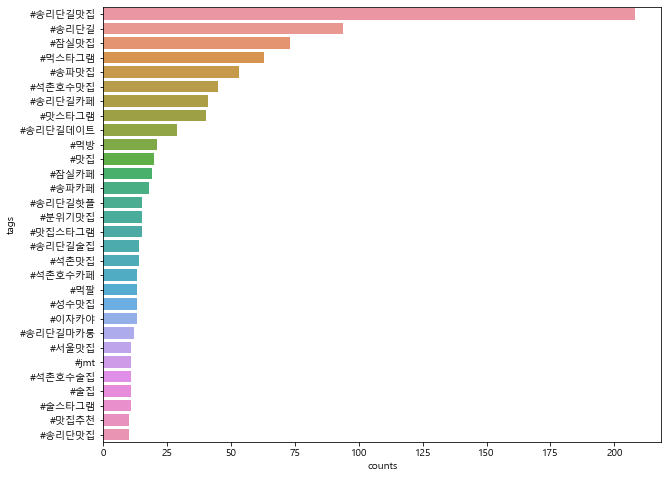

In [128]:
plt.figure(figsize = (10,8))
sns.barplot(x = 'counts', y="tags", data = tag_counts_df)

In [133]:
import matplotlib.pyplot as plt 
from wordcloud import WordCloud
import platform

if platform.system() == 'Windows':
    font_path = "c:/Windows/Fonts/malgun.ttf"
elif platform.system() == "Darwin": 
    font_path = "User/$USER/Library/Fonts/AppleGothic.ttf"

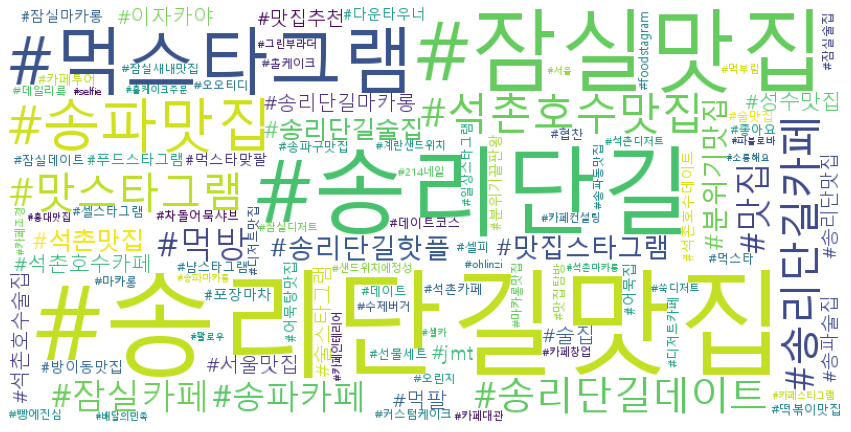

In [137]:
# 워드 클라우드 만들기

wordcloud = WordCloud(font_path = font_path,
                      background_color = 'white',
                      max_words = 100, 
                      relative_scaling =0.3,
                      width=800, 
                      height=400).generate_from_frequencies(tag_counts_selected)
plt.figure(figsize = (15,10))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('./files/tag_wordcloud.png')